In [2]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression

In [3]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [4]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-july-2023', '*'))
temp_dir

['temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv',
 'temperature-data-july-2023/planitgeo_cover_data .csv',
 'temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv',
 'temperature-data-july-2023/nightday_temps.csv',
 'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv',
 'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv',
 'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv',
 'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv',
 'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv',
 'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv',
 'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv',
 'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv',
 'temp

In [5]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv')
sensor_002 = import_temp_csv(
    'temperature-data-july-2023/#002 2023-07-26 16_20_51 MDT (Data MDT).csv')
sensor_003 = import_temp_csv(
    'temperature-data-july-2023/#003 2023-07-26 16_37_06 MDT (Data MDT).csv')
sensor_004 = import_temp_csv(
    'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv')
sensor_005 = import_temp_csv(
    'temperature-data-july-2023/#005 2023-07-27 09_10_26 MDT (Data MDT).csv')
sensor_006 = import_temp_csv(
    'temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv')
sensor_007 = import_temp_csv(
    'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv')
sensor_008 = import_temp_csv(
    'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv')
sensor_009 = import_temp_csv(
    'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv')
sensor_010 = import_temp_csv(
    'temperature-data-july-2023/#010 2023-07-27 16_31_28 MDT (Data MDT).csv')
sensor_011 = import_temp_csv(
     'temperature-data-july-2023/#011 2023-07-27 16_10_01 MDT (Data MDT).csv')
sensor_012 = import_temp_csv(
     'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv')
sensor_013 = import_temp_csv(
    'temperature-data-july-2023/#013 2023-07-27 15_46_42 MDT (Data MDT).csv')
sensor_014 = import_temp_csv(
    'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv')
sensor_015 = import_temp_csv(
     'temperature-data-july-2023/#015 2023-07-27 14_47_01 MDT (Data MDT).csv')
sensor_016 = import_temp_csv( 
     'temperature-data-july-2023/#016 2023-07-27 11_07_55 MDT (Data MDT).csv')
sensor_017 = import_temp_csv( 
    'temperature-data-july-2023/#017 2023-07-27 16_18_24 MDT (Data MDT).csv')
sensor_018 = import_temp_csv(
    'temperature-data-july-2023/#018 2023-07-27 13_31_24 MDT (Data MDT).csv')
sensor_019 = import_temp_csv(
    'temperature-data-july-2023/#019 2023-07-20 09_56_28 MDT (Data MDT).csv')
sensor_020 = import_temp_csv(
     'temperature-data-july-2023/#020 2023-07-27 11_26_09 MDT (Data MDT).csv')
sensor_021 = import_temp_csv(
    'temperature-data-july-2023/#021 2023-07-27 10_51_59 MDT (Data MDT).csv')
sensor_022 = import_temp_csv(
    'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv')
sensor_023 = import_temp_csv(
    'temperature-data-july-2023/#023 2023-07-27 10_12_17 MDT (Data MDT).csv')
sensor_024 = import_temp_csv(
     'temperature-data-july-2023/#024 2023-07-27 09_59_43 MDT (Data MDT).csv')
sensor_025 = import_temp_csv(
    'temperature-data-july-2023/#025 2023-07-27 09_53_14 MDT (Data MDT).csv')
sensor_026 = import_temp_csv(
    'temperature-data-july-2023/#026 2023-07-19 12_37_31 MDT (Data MDT).csv')
sensor_027 = import_temp_csv(
    'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv')
sensor_028 = import_temp_csv(
    'temperature-data-july-2023/#028 2023-07-27 15_24_45 MDT (Data MDT).csv')
sensor_029 = import_temp_csv(
    'temperature-data-july-2023/#029 2023-07-27 15_12_52 MDT (Data MDT).csv')
sensor_030a = import_temp_csv(
     'temperature-data-july-2023/#030 2023-07-06 16_04_11 MDT (Data MDT).csv')
sensor_030b = import_temp_csv(
    'temperature-data-july-2023/#030 replacement  2023-07-27 16_39_11 MDT (Data MDT).csv')
sensor_031 = import_temp_csv(
    'temperature-data-july-2023/#031 2023-07-26 14_58_30 MDT (Data MDT).csv')
sensor_035 = import_temp_csv(
    'temperature-data-july-2023/#035 2023-07-26 15_52_04 MDT (Data MDT).csv')
sensor_036 = import_temp_csv(
    'temperature-data-july-2023/#036 2023-07-26 15_20_32 MDT (Data MDT).csv')
sensor_037 = import_temp_csv(
    'temperature-data-july-2023/#037 2023-07-20 08_31_09 MDT (Data MDT).csv')
sensor_038 = import_temp_csv (
    'temperature-data-july-2023/#038 2023-07-19 10_30_13 MDT (Data MDT).csv')
sensor_039 =  import_temp_csv(
    'temperature-data-july-2023/#039 replacement  2023-07-27 15_37_41 MDT (Data MDT).csv')
sensor_040 = import_temp_csv(
    'temperature-data-july-2023/#040 2023-07-26 14_45_51 MDT (Data MDT).csv')
#sensor_041 = import_temp_csv()
sensor_042 = import_temp_csv(
    'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv')
sensor_043 = import_temp_csv(
    'temperature-data-july-2023/#043 2023-07-19 09_54_19 MDT (Data MDT).csv')

In [6]:
def edit_imported_temp_csv(df):
    """Edit sensor data to the correct parameters."""
    # Remove the first, third, and fourth columns
    df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])

    # Rename the index column to 'date_time'
    df.index.name = 'date_time'

    # Rename the first column to 'temp_fahrenheit'
    df = df.rename(columns={df.columns[0]: 'temp_fahrenheit'})

    return df



sensor_001 = edit_imported_temp_csv(sensor_001)
sensor_002 = edit_imported_temp_csv(sensor_002)
sensor_003 = edit_imported_temp_csv(sensor_003)
sensor_004 = edit_imported_temp_csv(sensor_004)
sensor_005 = edit_imported_temp_csv(sensor_005)
sensor_006 = edit_imported_temp_csv(sensor_006)
sensor_007 = edit_imported_temp_csv(sensor_007)
sensor_008 = edit_imported_temp_csv(sensor_008)
sensor_009 = edit_imported_temp_csv(sensor_009)
sensor_010 = edit_imported_temp_csv(sensor_010)
sensor_011 = edit_imported_temp_csv(sensor_011)
sensor_012 = edit_imported_temp_csv(sensor_012)
sensor_013 = edit_imported_temp_csv(sensor_013)
sensor_014 = edit_imported_temp_csv(sensor_014)
sensor_015 = edit_imported_temp_csv(sensor_015)
sensor_016 = edit_imported_temp_csv(sensor_016)
sensor_017 = edit_imported_temp_csv(sensor_017)
sensor_018 = edit_imported_temp_csv(sensor_018)
sensor_019 = edit_imported_temp_csv(sensor_019)
sensor_020 = edit_imported_temp_csv(sensor_020)
sensor_021 = edit_imported_temp_csv(sensor_021)
sensor_022 = edit_imported_temp_csv(sensor_022)
sensor_023 = edit_imported_temp_csv(sensor_023)
sensor_024 = edit_imported_temp_csv(sensor_024)
sensor_025 = edit_imported_temp_csv(sensor_025)
sensor_026 = edit_imported_temp_csv(sensor_026)
sensor_027 = edit_imported_temp_csv(sensor_027)
sensor_028 = edit_imported_temp_csv(sensor_028)
sensor_029 = edit_imported_temp_csv(sensor_029)
sensor_030a = edit_imported_temp_csv(sensor_030a)
sensor_030b = edit_imported_temp_csv(sensor_030b)
sensor_031 = edit_imported_temp_csv(sensor_031)
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = edit_imported_temp_csv(sensor_035)
sensor_036 = edit_imported_temp_csv(sensor_036)
sensor_037 = edit_imported_temp_csv(sensor_037)
sensor_038 = edit_imported_temp_csv(sensor_038)
sensor_039 = edit_imported_temp_csv(sensor_039)
sensor_040 = edit_imported_temp_csv(sensor_040)
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = edit_imported_temp_csv(sensor_042)
sensor_043 = edit_imported_temp_csv(sensor_043)

In [7]:
# Sensor 030 needs to be edited and combined. 
start_date_a = pd.to_datetime('2023-05-18')
end_date_a = pd.to_datetime('2023-07-08')

sensor_030a_period = sensor_030a[(sensor_030a.index >= start_date_a) & (sensor_030a.index <= end_date_a)]

start_date_b = pd.to_datetime('2023-07-08')

sensor_030b_period = sensor_030b[sensor_030b.index >= start_date_b]

sensor_030 = pd.concat([sensor_030a_period, sensor_030b_period])
sensor_030

,temp_fahrenheit
date_time,
2023-05-18 00:00:00,57.01
2023-05-18 00:05:00,56.55
2023-05-18 00:10:00,56.32
2023-05-18 00:15:00,56.01
2023-05-18 00:20:00,55.78
...,...
2023-07-27 16:19:00,93.08
2023-07-27 16:24:00,94.62
2023-07-27 16:29:00,95.32


In [8]:
# Edit kestrel sensors
def import_edit_irrigation(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Select the desired columns and rename them
    df = df.iloc[:, :2]  # Keep the first 2 columns (date_time and temp_f)
    df.columns = ['date_time', 'temp_fahrenheit']  # Rename the columns

    # Drop any rows with missing values in 'date_time' and 'temp_f' columns
    df.dropna(subset=['date_time', 'temp_fahrenheit'], inplace=True)

    # Convert 'date_time' column to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])

    return df


In [9]:
# Assign labels and edit the csv files 
sensor_044a = import_edit_irrigation('temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv')
sensor_044b = import_edit_irrigation('temperature-data-july-2023/#044B_Jul_27_2023_09_35_00.csv')
sensor_044c = import_edit_irrigation('temperature-data-july-2023/#044C_Jul_27_2023_09_15_00.csv')
sensor_045a = import_edit_irrigation('temperature-data-july-2023/#045A_Jul_27_2023_14_10_00.csv')
sensor_045b = import_edit_irrigation('temperature-data-july-2023/#045B_Jul_27_2023_14_25_00.csv')
sensor_045c = import_edit_irrigation('temperature-data-july-2023/#045C_Jul_27_2023_14_35_00.csv')
sensor_046a = import_edit_irrigation('temperature-data-july-2023/#046A_Jul_27_2023_17_00_00.csv')
#sensor_046b = import_edit_irrigation('temperature-data-2023/#046B_Jul_7_2023_11_02_28.csv')
sensor_047a = import_edit_irrigation('temperature-data-july-2023/#047A_Jul_27_2023_13_55_00.csv')
sensor_047b = import_edit_irrigation('temperature-data-july-2023/#047B_Jul_27_2023_13_45_00.csv')
sensor_048a = import_edit_irrigation('temperature-data-july-2023/#048A_Jul_27_2023_11_25_00.csv')
sensor_048b = import_edit_irrigation('temperature-data-july-2023/#048B_Jul_27_2023_11_35_00.csv')
sensor_049a = import_edit_irrigation('temperature-data-july-2023/#049A_Jul_26_2023_11_10_00.csv')
#sensor_049b = 
sensor_049a

,date_time,temp_fahrenheit
0,2000-01-01 00:10:00,75.0
1,2000-01-01 00:20:00,74.8
2,2000-01-01 00:30:00,74.7
3,2000-01-01 00:40:00,74.6
4,2000-01-01 00:50:00,74.5
5,2000-01-01 01:00:00,74.5
6,2023-05-25 16:16:00,72.7
7,2023-05-25 16:16:00,72.6
8,2023-05-25 16:16:00,72.6
9,2023-05-25 16:20:00,73.5


In [10]:
# Create a function for files so that each is by day and night 5 am to 10 pm for HOBO sensors
def day_night_temps(df, sensor_number):
    df.index = pd.to_datetime(df.index)
    df['Time of Day'] = 'Day'
    df.loc[(df.index.hour >= 22) | (df.index.hour <= 5), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [11]:
# Add function to all files (adding new column with sensor number and day/night)
day_night_temps(sensor_001, 'sensor_001')
day_night_temps(sensor_002, 'sensor_002')
day_night_temps(sensor_003, 'sensor_003')
day_night_temps(sensor_004, 'sensor_004')
day_night_temps(sensor_005, 'sensor_005')
day_night_temps(sensor_006, 'sensor_006')
day_night_temps(sensor_007, 'sensor_007')
day_night_temps(sensor_009, 'sensor_009')
day_night_temps(sensor_010, 'sensor_010')
day_night_temps(sensor_011, 'sensor_011')
day_night_temps(sensor_012, 'sensor_012')
day_night_temps(sensor_013, 'sensor_013')
day_night_temps(sensor_014, 'sensor_014')
day_night_temps(sensor_015, 'sensor_015')
day_night_temps(sensor_016, 'sensor_016')
day_night_temps(sensor_017, 'sensor_017')
day_night_temps(sensor_018, 'sensor_018')
day_night_temps(sensor_019, 'sensor_019')
day_night_temps(sensor_020, 'sensor_020')
day_night_temps(sensor_021, 'sensor_021')
day_night_temps(sensor_022, 'sensor_022')
day_night_temps(sensor_023, 'sensor_023')
day_night_temps(sensor_024, 'sensor_024')
day_night_temps(sensor_025, 'sensor_025')
day_night_temps(sensor_026, 'sensor_026')
day_night_temps(sensor_027, 'sensor_027')
day_night_temps(sensor_028, 'sensor_028')
day_night_temps(sensor_029, 'sensor_029')
day_night_temps(sensor_030, 'sensor_030')
day_night_temps(sensor_031, 'sensor_031')
#day_night_temps(sensor_032, 'sensor_032')
#day_night_temps(sensor_033, 'sensor_033')
#day_night_temps(sensor_034, 'sensor_034')
day_night_temps(sensor_035, 'sensor_035')
day_night_temps(sensor_036, 'sensor_036')
day_night_temps(sensor_037, 'sensor_037')
day_night_temps(sensor_038, 'sensor_038')
day_night_temps(sensor_039, 'sensor_039')
day_night_temps(sensor_040, 'sensor_040')
#day_night_temps(sensor_041, 'sensor_041')
day_night_temps(sensor_042, 'sensor_042')
day_night_temps(sensor_043, 'sensor_043')

,temp_fahrenheit,Time of Day,sensor_number
date_time,,,
2023-05-17 00:00:00,64.58,Night,sensor_043
2023-05-17 00:05:00,64.35,Night,sensor_043
2023-05-17 00:10:00,64.20,Night,sensor_043
2023-05-17 00:15:00,63.89,Night,sensor_043
2023-05-17 00:20:00,63.73,Night,sensor_043
...,...,...,...
2023-07-19 09:35:00,78.87,Day,sensor_043
2023-07-19 09:40:00,78.87,Day,sensor_043
2023-07-19 09:45:00,78.87,Day,sensor_043


In [12]:
# Add day/night for kestrel sensors. 
def add_time_of_day_and_sensor_number(df, sensor_number):
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['Time of Day'] = 'Day'
    df.loc[(df['date_time'].dt.hour >= 22) | (df['date_time'].dt.hour <= 5), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [13]:
# Edit day/night and sensor number for kestrel sensors
sensor_044a = add_time_of_day_and_sensor_number(sensor_044a, 'sensor_044a')
sensor_044b = add_time_of_day_and_sensor_number(sensor_044b, 'sensor_044b')
sensor_044c = add_time_of_day_and_sensor_number(sensor_044c, 'sensor_044c')
sensor_045a = add_time_of_day_and_sensor_number(sensor_045a, 'sensor_045a')
sensor_045b = add_time_of_day_and_sensor_number(sensor_045b, 'sensor_045b')
sensor_045c = add_time_of_day_and_sensor_number(sensor_045c, 'sensor_045c')
sensor_046a = add_time_of_day_and_sensor_number(sensor_046a, 'sensor_046a')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = add_time_of_day_and_sensor_number(sensor_047a, 'sensor_047a')
sensor_047b = add_time_of_day_and_sensor_number(sensor_047b, 'sensor_047b')
sensor_048a = add_time_of_day_and_sensor_number(sensor_048a, 'sensor_048a')
sensor_048b = add_time_of_day_and_sensor_number(sensor_048b, 'sensor_048b')
sensor_049a = add_time_of_day_and_sensor_number(sensor_049a, 'sensor_049b')
#sensor_049b = add_time_of_day_and_sensor_number
sensor_049a

,date_time,temp_fahrenheit,Time of Day,sensor_number
0,2000-01-01 00:10:00,75.0,Night,sensor_049b
1,2000-01-01 00:20:00,74.8,Night,sensor_049b
2,2000-01-01 00:30:00,74.7,Night,sensor_049b
3,2000-01-01 00:40:00,74.6,Night,sensor_049b
4,2000-01-01 00:50:00,74.5,Night,sensor_049b
5,2000-01-01 01:00:00,74.5,Night,sensor_049b
6,2023-05-25 16:16:00,72.7,Day,sensor_049b
7,2023-05-25 16:16:00,72.6,Day,sensor_049b
8,2023-05-25 16:16:00,72.6,Day,sensor_049b
9,2023-05-25 16:20:00,73.5,Day,sensor_049b


In [14]:
# Edit start dates for kestrel sensors
def filter_data_for_sensor(df, sensor_number, start_date):
    df['date_time'] = pd.to_datetime(df['date_time'])
    filtered_df = df[(df['date_time'] >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df

In [15]:
# Filter kestrel sensor dates
sensor_044a = filter_data_for_sensor(sensor_044a, 'sensor_044A', '2023-07-01 00:00:00')
sensor_044b = filter_data_for_sensor(sensor_044b, 'sensor_044B', '2023-07-01 00:00:00')
sensor_044b = filter_data_for_sensor(sensor_044c, 'sensor_044C', '2023-07-15 00:00:00')
sensor_045a = filter_data_for_sensor(sensor_045a, 'sensor_045A', '2023-07-01 00:00:00')
sensor_045b = filter_data_for_sensor(sensor_045b, 'sensor_045B', '2023-07-01 00:00:00')
sensor_045b = filter_data_for_sensor(sensor_045c, 'sensor_045C', '2023-07-15 00:00:00')
sensor_046a = filter_data_for_sensor(sensor_046a, 'sensor_046A', '2023-07-01 00:00:00')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = filter_data_for_sensor(sensor_047a, 'sensor_047A', '2023-07-07 00:00:00')
sensor_047b = filter_data_for_sensor(sensor_047b, 'sensor_047B', '2023-07-07 00:00:00')
sensor_048a = filter_data_for_sensor(sensor_048a, 'sensor_048A', '2023-07-21 00:00:00')
sensor_048b = filter_data_for_sensor(sensor_048b, 'sensor_048B', '2023-07-21 00:00:00')
sensor_049a = filter_data_for_sensor(sensor_049a, 'sensor_049A', '2023-07-26 00:00:00')
#sensor_049b = add_time_of_day_and_sensor_number

In [16]:
# Edit start dates for kestrel sensors
def filter_data_for_sensor(df, sensor_number, start_date):
    df['date_time'] = pd.to_datetime(df['date_time'])
    filtered_df = df[(df['date_time'] >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df
# Filter kestrel sensor dates
sensor_044a = filter_data_for_sensor(sensor_044a, 'sensor_044a', '2023-07-01 00:00:00')
sensor_044b = filter_data_for_sensor(sensor_044b, 'sensor_044b', '2023-07-01 00:00:00')
sensor_044c = filter_data_for_sensor(sensor_044c, 'sensor_044c', '2023-07-15 00:00:00')
sensor_045a = filter_data_for_sensor(sensor_045a, 'sensor_045a', '2023-07-01 00:00:00')
sensor_045b = filter_data_for_sensor(sensor_045b, 'sensor_045b', '2023-07-01 00:00:00')
sensor_045c = filter_data_for_sensor(sensor_045c, 'sensor_045c', '2023-07-15 00:00:00')
sensor_046a = filter_data_for_sensor(sensor_046a, 'sensor_046a', '2023-07-01 00:00:00')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = filter_data_for_sensor(sensor_047a, 'sensor_047a', '2023-07-07 00:00:00')
sensor_047b = filter_data_for_sensor(sensor_047b, 'sensor_047b', '2023-07-07 00:00:00')
sensor_048a = filter_data_for_sensor(sensor_048a, 'sensor_048a', '2023-07-21 00:00:00')
sensor_048b = filter_data_for_sensor(sensor_048b, 'sensor_048b', '2023-07-21 00:00:00')
sensor_049a = filter_data_for_sensor(sensor_049a, 'sensor_049a', '2023-07-26 00:00:00')
#sensor_049b = add_time_of_day_and_sensor_number

In [17]:
# Combine all of the files that have been sorted into night and day into one and concat. 
nightday_list = (sensor_001,
sensor_002,
sensor_003,
sensor_004,
sensor_005,
sensor_006,
sensor_007,
sensor_008,
sensor_009,
sensor_010,
sensor_011,
sensor_012,
sensor_013,
sensor_014,
sensor_015,
sensor_016,
sensor_017,
sensor_018,
sensor_019,
sensor_020,
sensor_021,
sensor_022,
sensor_023,
sensor_024,
sensor_025,
sensor_026,
sensor_027,
sensor_028,
sensor_029,
sensor_030,
sensor_031,
#sensor_032,
#sensor_033,
#sensor_034,
sensor_035,
sensor_036,
sensor_037,
sensor_038,
sensor_039,
sensor_040,
#sensor_041,
sensor_042,
sensor_043,
)
nightday_dfa = pd.concat(nightday_list)
nightday_dfa

,temp_fahrenheit,Time of Day,sensor_number
date_time,,,
2023-05-17 00:00:00,65.51,Night,sensor_001
2023-05-17 00:05:00,65.28,Night,sensor_001
2023-05-17 00:10:00,65.12,Night,sensor_001
2023-05-17 00:15:00,64.89,Night,sensor_001
2023-05-17 00:20:00,64.81,Night,sensor_001
...,...,...,...
2023-07-19 09:35:00,78.87,Day,sensor_043
2023-07-19 09:40:00,78.87,Day,sensor_043
2023-07-19 09:45:00,78.87,Day,sensor_043


In [18]:
kestrel_list = (sensor_044a, 
sensor_044b, 
sensor_044c, 
sensor_045a,
sensor_045b,
sensor_045c,
sensor_046a,
#sensor_046b,
sensor_047a,
sensor_048a,
sensor_048b,
sensor_049a)
#sensor_049b)
nightday_dfb = pd.concat(kestrel_list)
nightday_dfb.set_index('date_time', inplace=True)
nightday_dfb

,temp_fahrenheit,Time of Day,sensor_number
date_time,,,
2023-07-15 00:00:00,60.6,Night,sensor_044c
2023-07-15 00:05:00,60.8,Night,sensor_044c
2023-07-15 00:10:00,60.9,Night,sensor_044c
2023-07-15 00:15:00,60.6,Night,sensor_044c
2023-07-15 00:20:00,59.7,Night,sensor_044c
...,...,...,...
2023-07-27 14:15:00,93.1,Day,sensor_045c
2023-07-27 14:20:00,92.0,Day,sensor_045c
2023-07-27 14:25:00,94.8,Day,sensor_045c


In [19]:
# Combine two separate temp dataframes 

# Concatenate the two DataFrames
nightday_df = pd.concat([nightday_dfa, nightday_dfb])

# Reset the index
nightday_df.reset_index(inplace=True)

# Optional: Drop any rows with NaN values
nightday_df.dropna(inplace=True)

# Set 'date_time' as the index column
nightday_df.set_index('date_time', inplace=True)

# Display the combined DataFrame
print(nightday_df)


                     temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-17 00:00:00            65.51       Night    sensor_001
2023-05-17 00:05:00            65.28       Night    sensor_001
2023-05-17 00:10:00            65.12       Night    sensor_001
2023-05-17 00:15:00            64.89       Night    sensor_001
2023-05-17 00:20:00            64.81       Night    sensor_001
...                              ...         ...           ...
2023-07-27 14:15:00            93.10         Day   sensor_045c
2023-07-27 14:20:00            92.00         Day   sensor_045c
2023-07-27 14:25:00            94.80         Day   sensor_045c
2023-07-27 14:30:00            97.00         Day   sensor_045c
2023-07-27 14:35:00            96.40         Day   sensor_045c

[755159 rows x 3 columns]


In [30]:
# Export csv file of data 
nightday_csv = nightday_df.reset_index(drop=False)
nightday_csv.to_csv('nightday_csv.csv', index=False)

In [20]:
# Add start dates for HOBO sensors 

def filter_data_for_sensor_index_as_datetime(df, sensor_number, start_date):
    # Filter by sensor number and date range
    filtered_df = df.loc[(df.index >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df

In [21]:
# Filter sensors for start dates 
sensor_024 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-06-22 00:00:00')
sensor_026 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_037 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_038 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_042 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_043 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-19 00:00:00')
                                                    
# Change start dates for other sensors
sensor_001 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_001', '2023-05-18 00:00:00')
sensor_002 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_002', '2023-05-18 00:00:00')
sensor_003 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_003', '2023-05-18 00:00:00')
sensor_004 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_004', '2023-05-18 00:00:00')
sensor_005 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_005', '2023-05-18 00:00:00')
sensor_006 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_006', '2023-05-18 00:00:00')
sensor_007 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_007', '2023-05-18 00:00:00')
sensor_008 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_008', '2023-05-18 00:00:00')
sensor_009 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_009', '2023-05-18 00:00:00')
sensor_010 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_010', '2023-05-18 00:00:00')
sensor_011 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_011', '2023-05-18 00:00:00')
sensor_012 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_012', '2023-05-18 00:00:00')
sensor_013 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_013', '2023-05-18 00:00:00')
sensor_014 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_014', '2023-05-18 00:00:00')
sensor_015 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_015', '2023-05-18 00:00:00')
sensor_016 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_016', '2023-05-18 00:00:00')
sensor_017 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_017', '2023-05-18 00:00:00')
sensor_018 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_018', '2023-05-18 00:00:00')
sensor_019 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_019', '2023-05-18 00:00:00')
sensor_020 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_020', '2023-05-18 00:00:00')
sensor_021 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_021', '2023-05-18 00:00:00')
sensor_022 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_022', '2023-05-18 00:00:00')
sensor_023 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_023', '2023-05-18 00:00:00')
sensor_025 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_025', '2023-05-18 00:00:00')
sensor_027 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_027', '2023-05-18 00:00:00')
sensor_028 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_028', '2023-05-18 00:00:00')
sensor_029 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_029', '2023-05-18 00:00:00')
sensor_030 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_030', '2023-05-18 00:00:00')                                                      
sensor_031 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_031', '2023-05-18 00:00:00')
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_035', '2023-05-18 00:00:00')
sensor_036 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_036', '2023-05-18 00:00:00')
sensor_039 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_039', '2023-05-18 00:00:00')
sensor_040 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_040', '2023-05-18 00:00:00')
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_042', '2023-05-20 00:00:00')
sensor_043 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_043', '2023-05-19 00:00:00')

sensor_044a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_044a', '2023-07-01 00:00:00')
sensor_044b = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_044b', '2023-07-01 00:00:00')
sensor_044c = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_044c', '2023-07-15 00:00:00')
sensor_045a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_045a', '2023-07-01 00:00:00')
sensor_045b = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_045b', '2023-07-01 00:00:00')
sensor_045c = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_045c', '2023-07-15 00:00:00')
sensor_046a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_046a', '2023-07-01 00:00:00')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_047a', '2023-07-07 00:00:00')
sensor_047b = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_047b', '2023-07-07 00:00:00')
sensor_048a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_048a', '2023-07-21 00:00:00')
sensor_048b = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_048b', '2023-07-21 00:00:00')
sensor_049a = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_049a', '2023-07-26 00:00:00')

In [22]:
# Edit Harlow park sensor because it was in the water (sensor 30)
start_date = '2023-06-06'
end_date = '2023-07-08'
sensor_to_exclude = 'sensor_030'

# Filter the DataFrame based on the condition
nightday_df = nightday_df[~((nightday_df['sensor_number'] == sensor_to_exclude) & (nightday_df.index >= start_date) & (nightday_df.index <= end_date))]

print("DataFrame after removing dates for", sensor_to_exclude, "within the specified date range:")
print(nightday_df)

DataFrame after removing dates for sensor_030 within the specified date range:
                     temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-17 00:00:00            65.51       Night    sensor_001
2023-05-17 00:05:00            65.28       Night    sensor_001
2023-05-17 00:10:00            65.12       Night    sensor_001
2023-05-17 00:15:00            64.89       Night    sensor_001
2023-05-17 00:20:00            64.81       Night    sensor_001
...                              ...         ...           ...
2023-07-27 14:15:00            93.10         Day   sensor_045c
2023-07-27 14:20:00            92.00         Day   sensor_045c
2023-07-27 14:25:00            94.80         Day   sensor_045c
2023-07-27 14:30:00            97.00         Day   sensor_045c
2023-07-27 14:35:00            96.40         Day   sensor_045c

[746326 rows x 3 columns]


In [23]:
# Get the daily max and average

# Get the daily max temperature for each day
daily_max_temps = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df.index.date])['temp_fahrenheit'].max()

# Convert the index to DatetimeIndex
nightday_df.index = pd.to_datetime(nightday_df.index)

# Create a new column with just the month
nightday_df['month'] = nightday_df.index.month

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily max temperatures for each month
monthly_avg_max_temps = grouped['temp_fahrenheit'].mean()

# Convert the result to a DataFrame
monthly_avg_max_temps = monthly_avg_max_temps.reset_index()
monthly_avg_max_temps

,month,Time of Day,sensor_number,temp_fahrenheit
0,5,Day,sensor_001,65.060851
1,5,Day,sensor_002,64.694000
2,5,Day,sensor_003,65.299170
3,5,Day,sensor_004,65.188170
4,5,Day,sensor_005,63.711844
...,...,...,...,...
223,7,Night,sensor_040,65.707783
224,7,Night,sensor_042,65.937572
225,7,Night,sensor_043,67.905483
226,7,Night,sensor_044c,67.292565


In [24]:
# Import PlanItGeo data and edit 
new_cover_data = pd.read_csv('temperature-data-july-2023/planitgeo_cover_data .csv')
new_cover_data.dropna(how='all', inplace=True)  # Remove rows with all NaN values
new_cover_data.dropna(axis=1, how='all', inplace=True)  # Remove columns with all NaN values
new_cover_data.loc[0:44, 'ID'] = 'sensor_' + new_cover_data['ID'].astype(str).str.zfill(3)
#Apply formatting to ID column for rows 45-58
new_cover_data.loc[45:58, 'ID'] = 'sensor_' + new_cover_data.loc[45:58, 'ID'].astype(str).str.zfill(4)
print(new_cover_data)
new_cover_data

             ID  cc_per_planitgeo  ic_per_planitgeo cc-densiometer-average
0    sensor_001          22.07720          52.56680                  54.76
1    sensor_002          39.00000          32.00000                  86.74
2    sensor_003          13.89370           5.05866                  14.12
3    sensor_004          63.39830          40.13400                 60.225
4    sensor_005           1.41375           9.49103                      0
5    sensor_006           1.41375           9.49103                      0
6    sensor_007           6.00000          56.00000                      0
7    sensor_008          30.00000          44.00000                  14.12
8    sensor_009          29.31400           8.24081                  90.12
9    sensor_010          28.00000          46.00000                   38.9
10   sensor_011          29.45750           1.97122                  83.62
11   sensor_012          20.56441          65.58350                  76.34
12   sensor_013          

,ID,cc_per_planitgeo,ic_per_planitgeo,cc-densiometer-average
0,sensor_001,22.07720,52.56680,54.76
1,sensor_002,39.00000,32.00000,86.74
2,sensor_003,13.89370,5.05866,14.12
3,sensor_004,63.39830,40.13400,60.225
4,sensor_005,1.41375,9.49103,0
5,sensor_006,1.41375,9.49103,0
6,sensor_007,6.00000,56.00000,0
7,sensor_008,30.00000,44.00000,14.12
8,sensor_009,29.31400,8.24081,90.12
9,sensor_010,28.00000,46.00000,38.9


In [25]:
# Merge planitgeo data with data frame for plotting (monthly_avg_max_temps)
# Merge the two DataFrames based on the 'ID' and 'sensor_number' columns
monthly_temps_new_data = monthly_avg_max_temps.merge(new_cover_data, left_on='sensor_number', right_on='ID', how='left')

# Drop the duplicate 'ID' column that came from the merge
monthly_temps_new_data = monthly_temps_new_data.drop(columns=['ID'])

monthly_temps_new_data['cc-densiometer-average'] = pd.to_numeric(monthly_temps_new_data['cc-densiometer-average'], errors='coerce')

# Print the merged DataFrame
monthly_temps_new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   228 non-null    int64  
 1   Time of Day             228 non-null    object 
 2   sensor_number           228 non-null    object 
 3   temp_fahrenheit         228 non-null    float64
 4   cc_per_planitgeo        228 non-null    float64
 5   ic_per_planitgeo        228 non-null    float64
 6   cc-densiometer-average  210 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 14.2+ KB


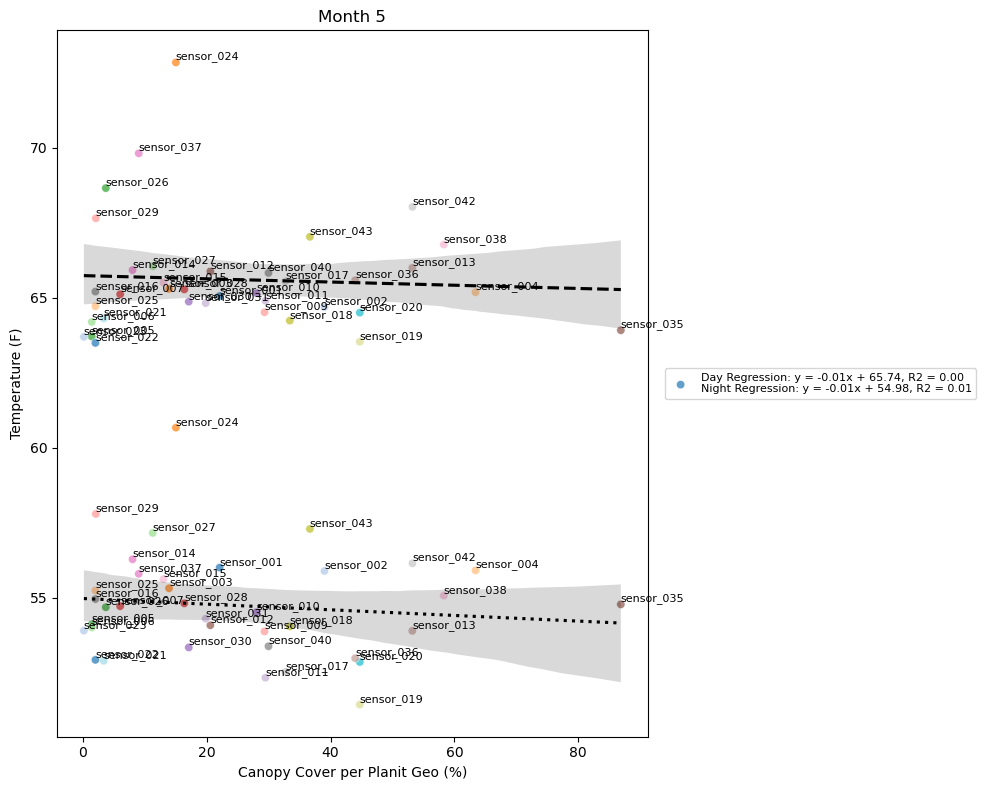

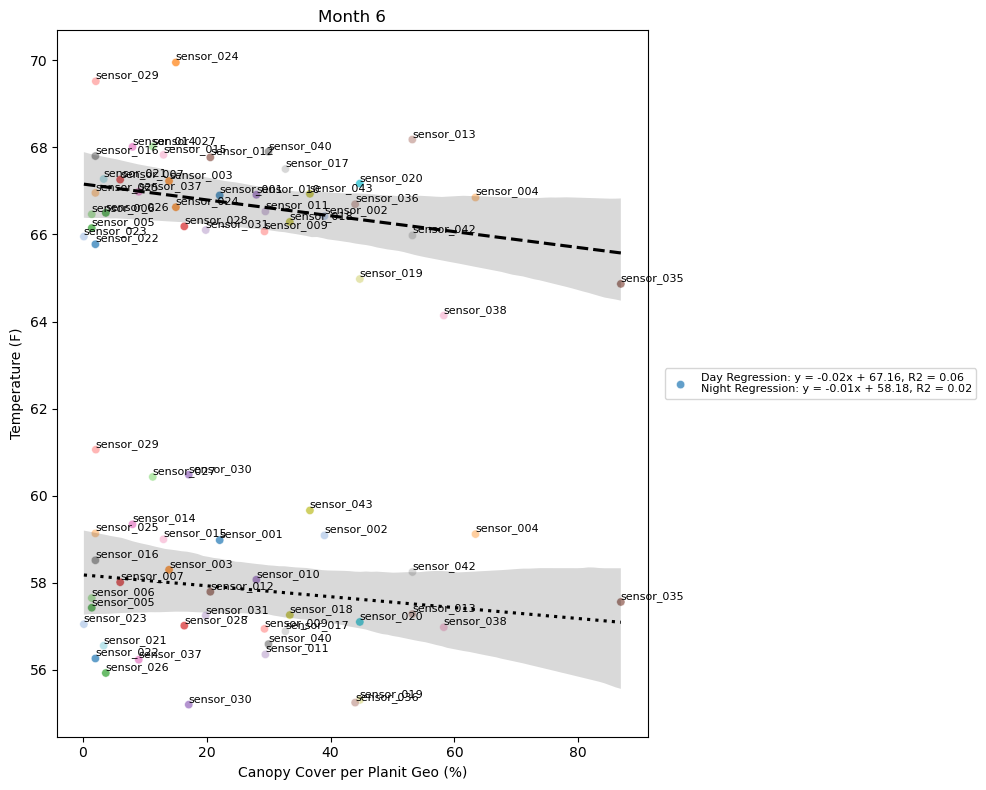

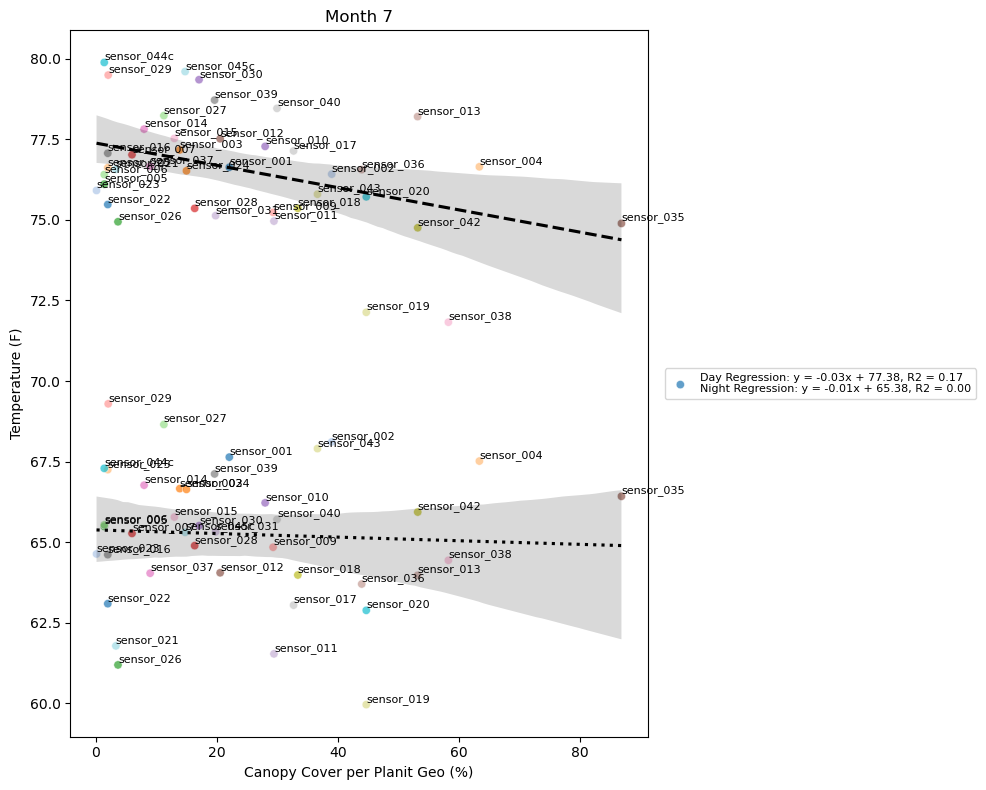

In [26]:
for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    # Create the plot as before, but replace 'cc_per_30' with 'cc_per_planitgeo' and 'Canopy Cover' with 'Impervious Cover'
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=month_data, x='cc_per_planitgeo', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o')
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='cc_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='cc_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['cc_per_planitgeo'], day_row[1]['temp_fahrenheit'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['cc_per_planitgeo'], night_row[1]['temp_fahrenheit'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    # Calculate regression coefficients and R-squared values for day and night data
    day_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'], 
                                  month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'], 1)
    night_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'], 
                                    month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'], 1)
    day_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'], 
                         month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'])[0, 1] ** 2
    night_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'], 
                           month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'])[0, 1] ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_coefficients[0]:.2f}x + {day_coefficients[1]:.2f}, R2 = {day_r2:.2f}\n" \
                  f"Night Regression: y = {night_coefficients[0]:.2f}x + {night_coefficients[1]:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Canopy Cover per Planit Geo (%)')
    ax.set_ylabel('Temperature (F)')

    # Save the plot with the legend
    plt.tight_layout()
    #plt.savefig(f'monthly_mean_max_ic_plot_month_{month}.pdf')
    plt.show()
    # For saving plot
    #plt.close()


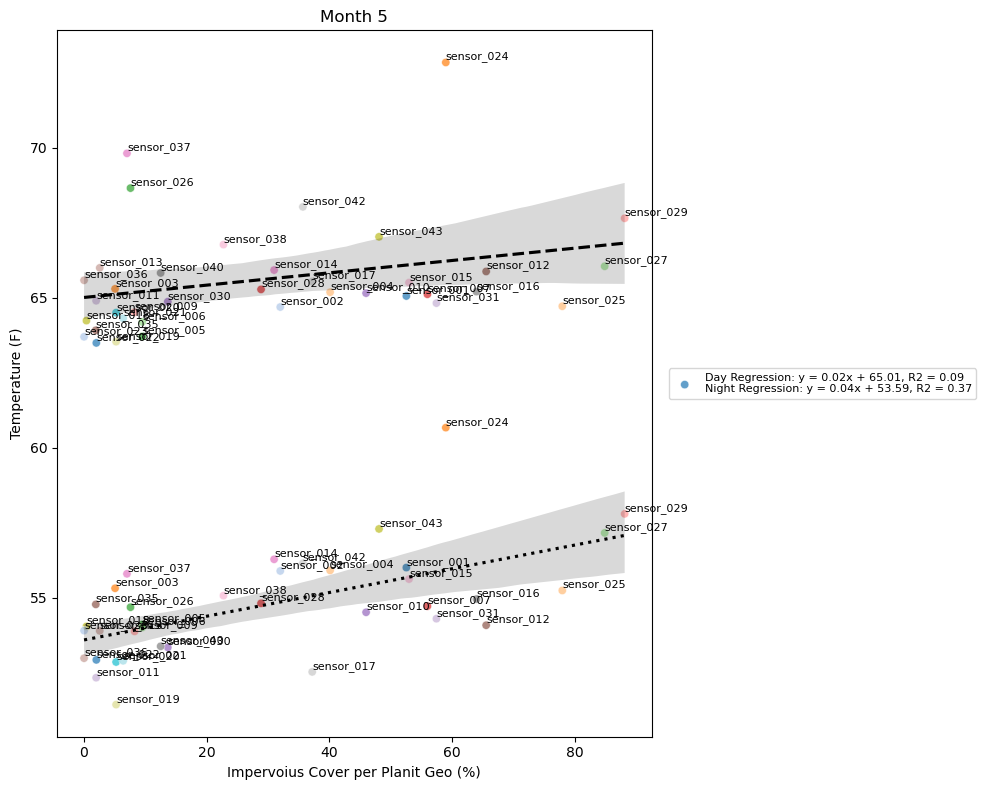

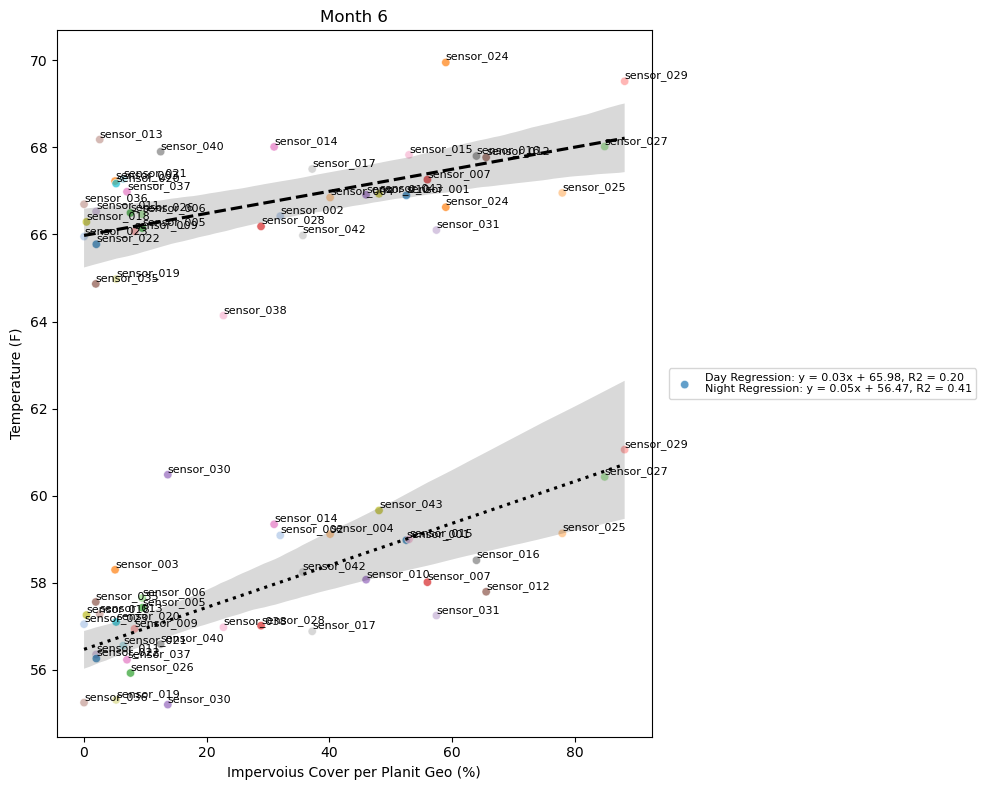

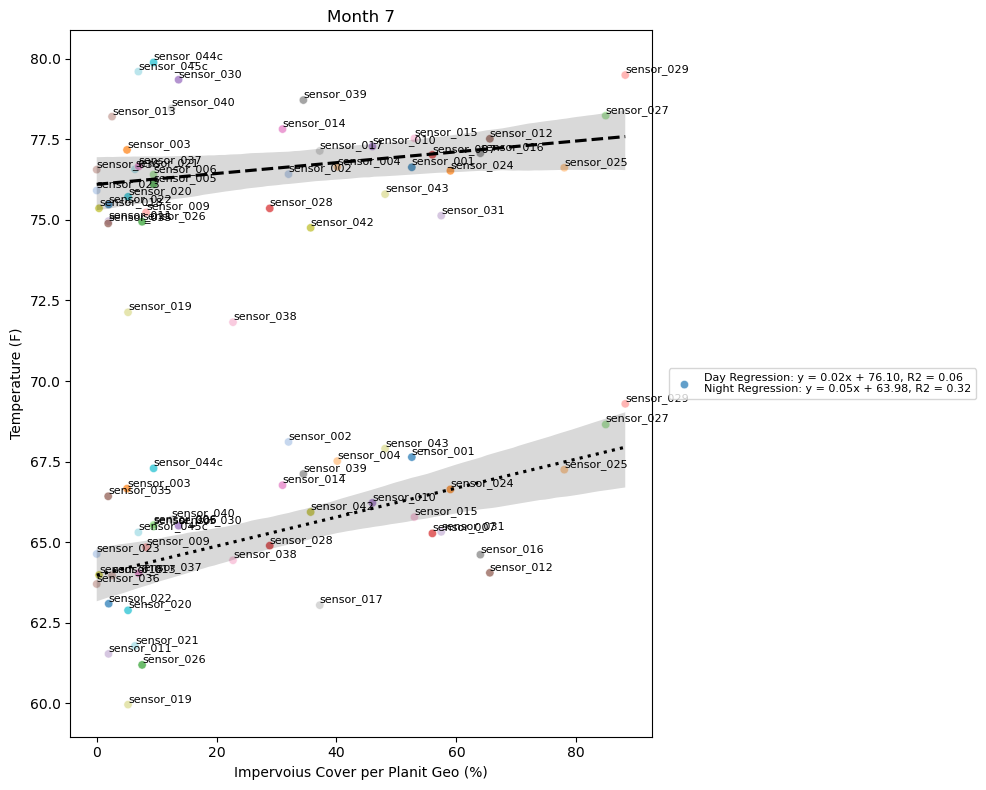

In [27]:
for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    # Create the plot as before, but replace 'cc_per_30' with 'cc_per_planitgeo' and 'Canopy Cover' with 'Impervious Cover'
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=month_data, x='ic_per_planitgeo', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o')
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='ic_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='ic_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['ic_per_planitgeo'], day_row[1]['temp_fahrenheit'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['ic_per_planitgeo'], night_row[1]['temp_fahrenheit'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    # Calculate regression coefficients and R-squared values for day and night data
    day_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Day']['ic_per_planitgeo'], 
                                  month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'], 1)
    night_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Night']['ic_per_planitgeo'], 
                                    month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'], 1)
    day_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Day']['ic_per_planitgeo'], 
                         month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'])[0, 1] ** 2
    night_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Night']['ic_per_planitgeo'], 
                           month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'])[0, 1] ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_coefficients[0]:.2f}x + {day_coefficients[1]:.2f}, R2 = {day_r2:.2f}\n" \
                  f"Night Regression: y = {night_coefficients[0]:.2f}x + {night_coefficients[1]:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Impervoius Cover per Planit Geo (%)')
    ax.set_ylabel('Temperature (F)')

    # Save the plot with the legend
    plt.tight_layout()
    #plt.savefig(f'monthly_mean_max_ic_plot_month_{month}.pdf')
    plt.show()
    # For saving plot
    #plt.close()


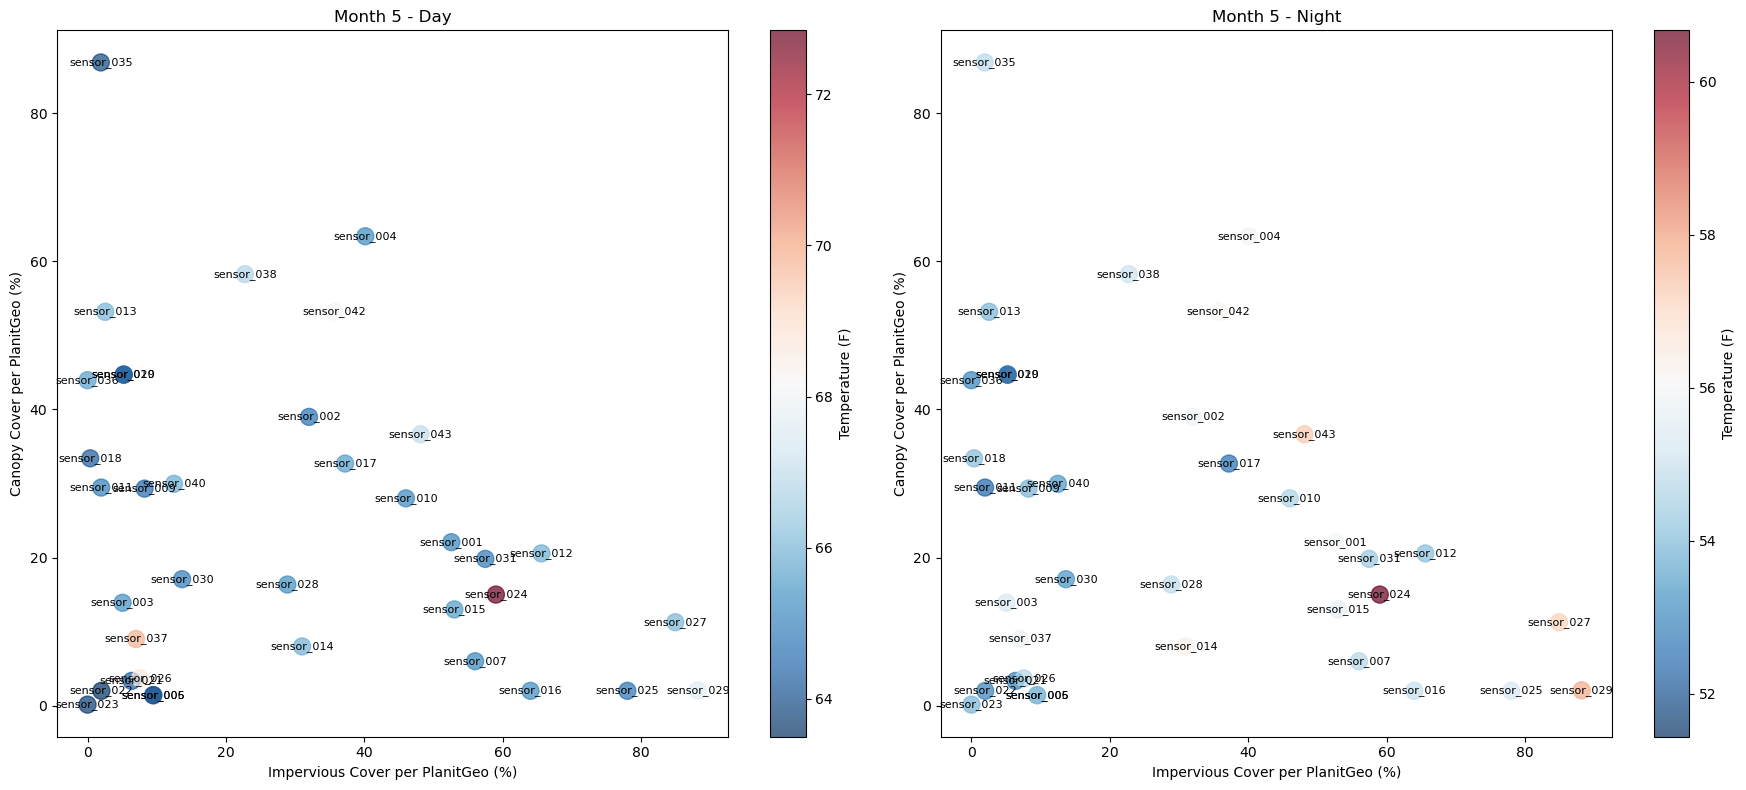

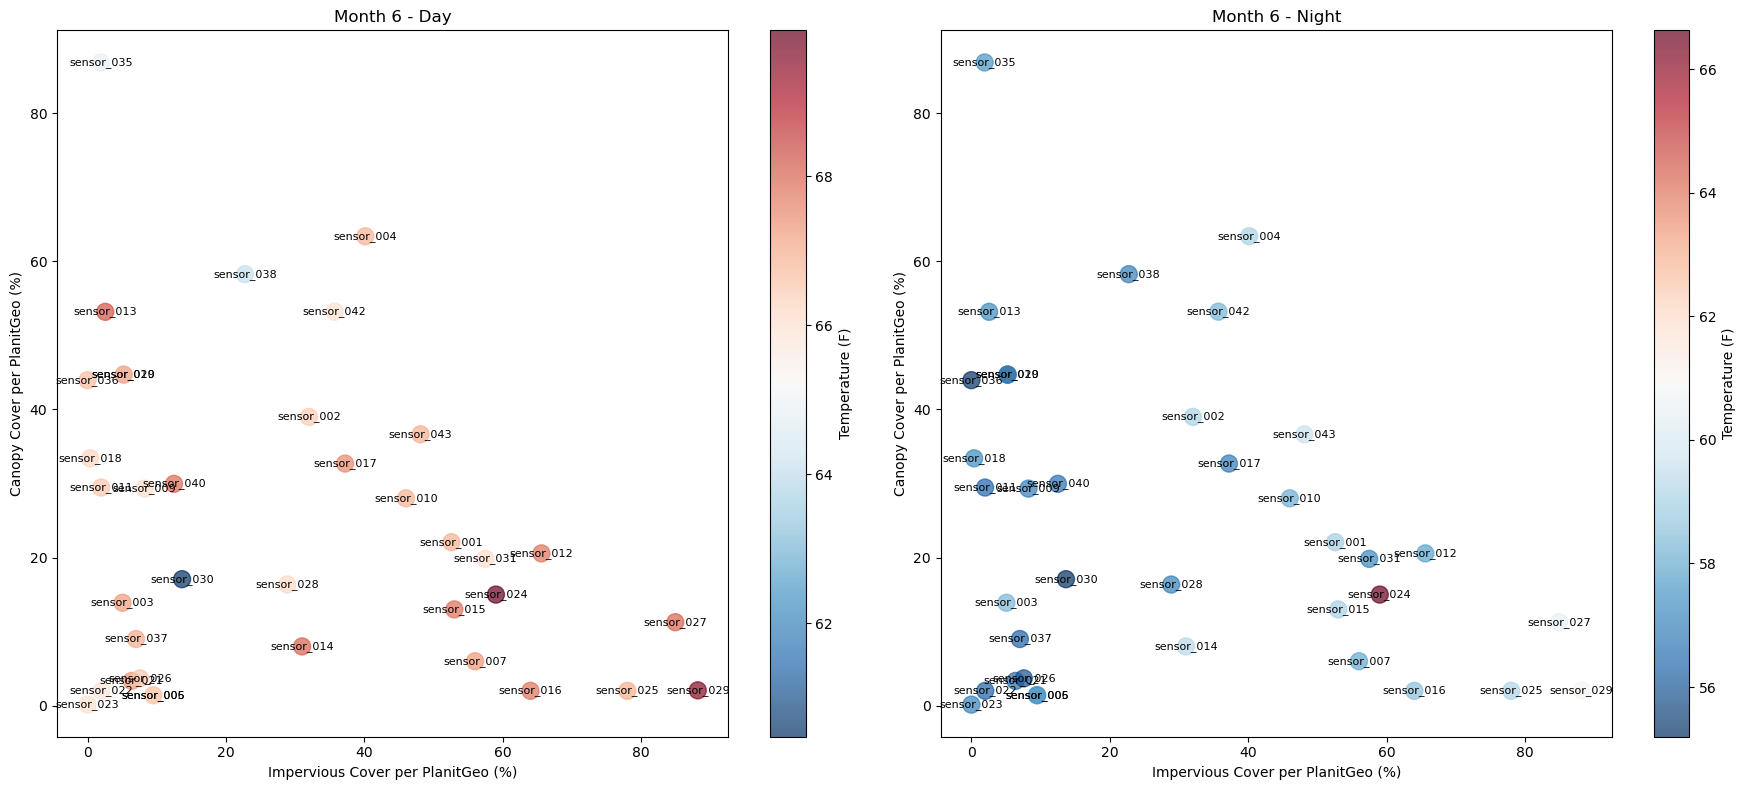

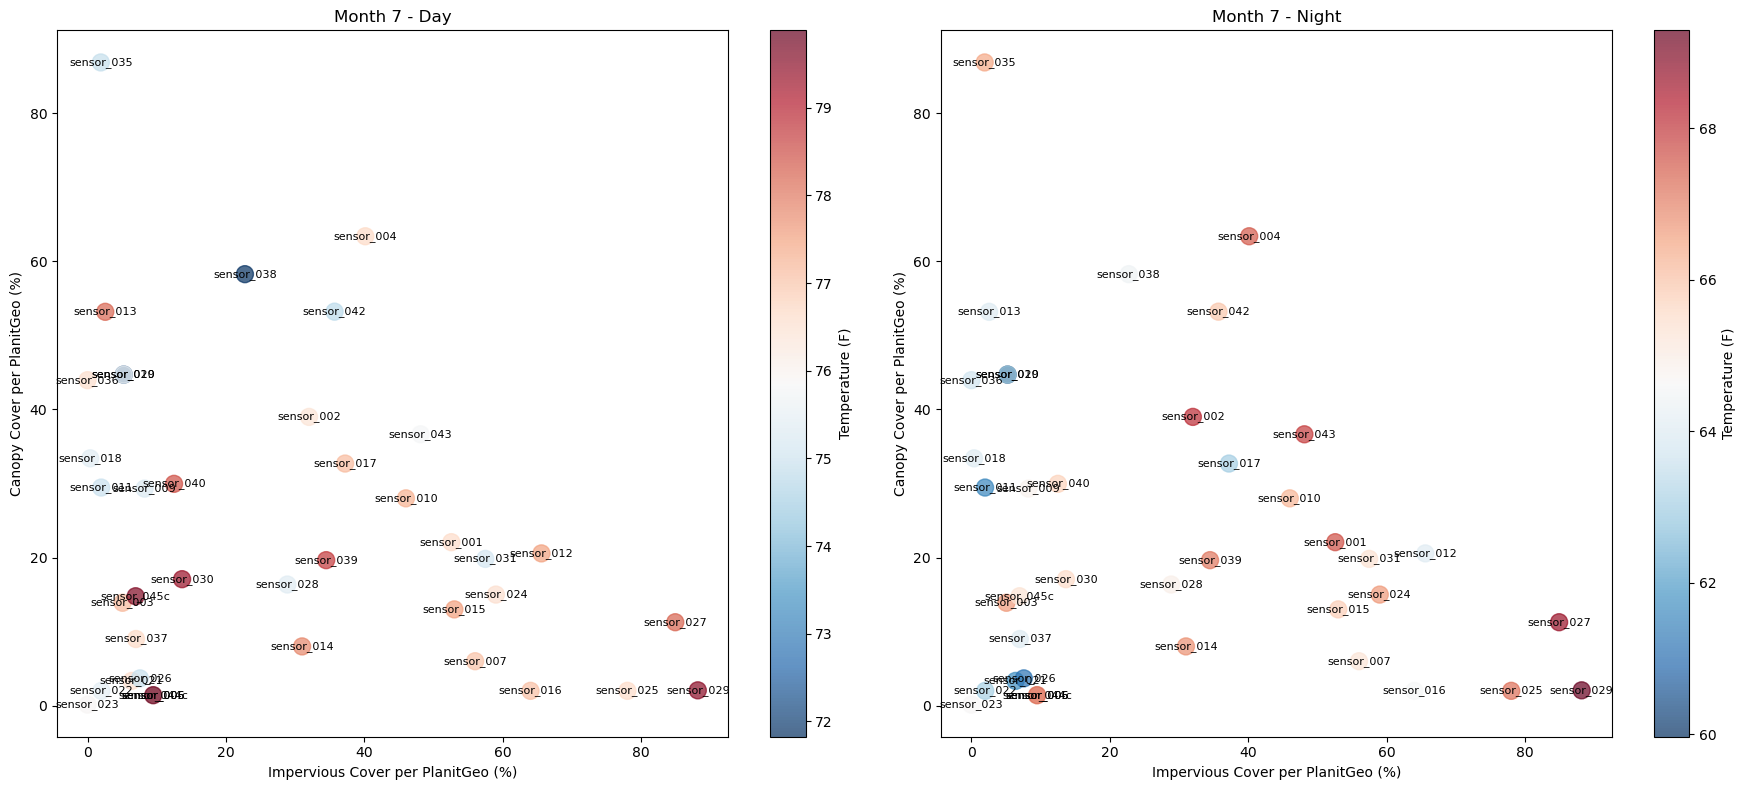

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your monthly_temps_new_data dataframe here
# monthly_temps_new_data = ...

# Define a custom colormap with red and blue colors
custom_colormap = plt.cm.get_cmap('RdBu_r')

months = monthly_temps_new_data['month'].unique()

for month in months:
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['ic_per_planitgeo'],
                                  month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'],
                                  cmap=custom_colormap, alpha=0.7, s=150)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['ic_per_planitgeo'],
                                      month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'],
                                      cmap=custom_colormap, alpha=0.7, s=150)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Temperature (F)')

    for _, row in month_data.iterrows():
        if row['Time of Day'] == 'Day':
            ax_day.text(row['ic_per_planitgeo'], row['cc_per_planitgeo'], row['sensor_number'],
                        fontsize=8, ha='center', va='center')
        elif row['Time of Day'] == 'Night':
            ax_night.text(row['ic_per_planitgeo'], row['cc_per_planitgeo'], row['sensor_number'],
                          fontsize=8, ha='center', va='center')

    ax_day.set_title(f"Month {month} - Day")
    ax_night.set_title(f"Month {month} - Night")

    ax_day.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_day.set_ylabel('Canopy Cover per PlanitGeo (%)')

    ax_night.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_night.set_ylabel('Canopy Cover per PlanitGeo (%)')

    plt.tight_layout()
   # plt.savefig(f'monthly_cc_ic_temp_spectrum_month_{month}_custom_colors_with_labels.pdf')
   # plt.close()
    plt.show()
